#Import Libraries

In [385]:
import pandas as pd

# Import Dataset

In [386]:
df = pd.read_csv('sport_data.csv')


# Data Analysis

In [387]:
df

,Age,Height,Sex,Sport
0,13,3,Male,Soccer
1,16,4,Male,Soccer
2,17,4,Male,Soccer
3,15,5,Male,Basketball
4,17,6,Male,Basketball
5,18,5,Male,Basketball
6,15,3,Male,Hockey
7,13,3,Male,Hockey
8,13,4,Male,Hockey
9,13,3,Female,Soccer


In [388]:
df.head()

,Age,Height,Sex,Sport
0,13,3,Male,Soccer
1,16,4,Male,Soccer
2,17,4,Male,Soccer
3,15,5,Male,Basketball
4,17,6,Male,Basketball


In [389]:
df.tail()

,Age,Height,Sex,Sport
13,17,4,Female,Basketball
14,19,6,Female,Basketball
15,13,3,Female,Hockey
16,14,4,Female,Hockey
17,14,3,Female,Hockey


In [390]:
df.shape

(18, 4)

In [391]:
df.describe()

,Age,Height
count,18.000000,18.000000
mean,15.166667,4.000000
std,1.917412,1.028992
min,13.000000,3.000000
25%,13.250000,3.000000
50%,15.000000,4.000000
75%,16.750000,4.750000
max,19.000000,6.000000


# Preprocess Data

In [392]:
# changing the values to float
# male to 1 female to 0

df['Sex'].replace({'Male': 1, 'Female': 0}, inplace=True)

In [393]:
df

,Age,Height,Sex,Sport
0,13,3,1,Soccer
1,16,4,1,Soccer
2,17,4,1,Soccer
3,15,5,1,Basketball
4,17,6,1,Basketball
5,18,5,1,Basketball
6,15,3,1,Hockey
7,13,3,1,Hockey
8,13,4,1,Hockey
9,13,3,0,Soccer


# Import ML libraries

In [394]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split


In [395]:
x = df.drop(columns='Sport')

In [396]:
x.head()

,Age,Height,Sex
0,13,3,1
1,16,4,1
2,17,4,1
3,15,5,1
4,17,6,1


In [397]:
y = df.drop(columns=['Age', 'Height', 'Sex'])

In [398]:
y.head()

,Sport
0,Soccer
1,Soccer
2,Soccer
3,Basketball
4,Basketball


In [399]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30)

# Build ML Model

In [400]:
clf = DecisionTreeClassifier()

In [401]:
clf.fit(x_train, y_train)

DecisionTreeClassifier()

# Test ML Model

In [402]:
test = clf.predict(x_test)

In [403]:
test

array(['Hockey', 'Hockey', 'Hockey', 'Basketball', 'Hockey', 'Soccer'],
      dtype=object)

In [404]:
# some prediction were right and some were wrong
y_test

,Sport
16,Hockey
6,Hockey
9,Soccer
14,Basketball
15,Hockey
1,Soccer


# Check for Efficacy

In [405]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [406]:
accuracy = accuracy_score(y_test,test)

In [407]:
accuracy

0.8333333333333334

In [409]:
new_student = clf.predict([[15, 4, 1]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [410]:
new_student

array(['Hockey'], dtype=object)

# Save Model

In [414]:
import joblib

In [416]:
joblib.dump(clf, 'ml_sport_model.joblib')

['ml_sport_model.joblib']

# Making predictions

In [417]:
from sklearn.tree import DecisionTreeClassifier
import joblib

In [418]:
model = joblib.load('ml_sport_model.joblib')

In [419]:
new_student2 = model.predict([[15, 4, 1]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [420]:
new_student2

array(['Hockey'], dtype=object)

In [428]:
from sklearn import metrics


In [433]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt

In [454]:
c_matrix = confusion_matrix(y_test, test)
c_matrix


array([[1, 0, 0],
       [0, 3, 0],
       [0, 1, 1]])

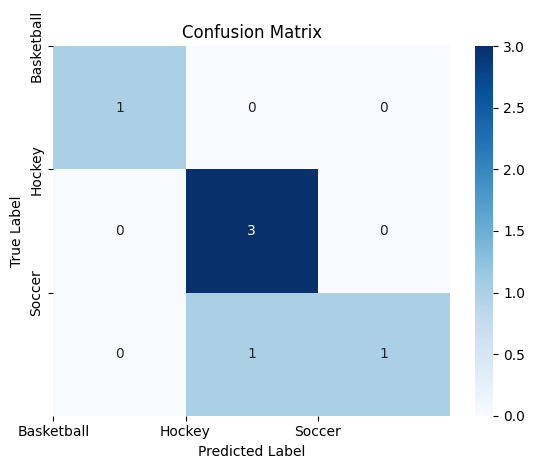

In [451]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get the confusion matrix from the previous step
c_matrix = confusion_matrix(y_test, y_pred)

# Create a heatmap of the confusion matrix
sns.heatmap(c_matrix, annot=True, cmap="Blues", fmt="d")

# Add labels and title
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

# Set the tick labels
plt.xticks(ticks=[0, 1, 2], labels=["Basketball", "Hockey", "Soccer"])
plt.yticks(ticks=[0, 1, 2], labels=["Basketball", "Hockey", "Soccer"])

# Show the plot
plt.show()

In [455]:
classification_report(y_test, test)

'              precision    recall  f1-score   support\n\n  Basketball       1.00      1.00      1.00         1\n      Hockey       0.75      1.00      0.86         3\n      Soccer       1.00      0.50      0.67         2\n\n    accuracy                           0.83         6\n   macro avg       0.92      0.83      0.84         6\nweighted avg       0.88      0.83      0.82         6\n'

In [ ]:
              precision    recall  f1-score   support

  Basketball       1.00      1.00      1.00         1
      Hockey       0.75      1.00      0.86         3
      Soccer       1.00      0.50      0.67         2

    accuracy                           0.83         6
   macro avg       0.92      0.83      0.84         6
weighted avg       0.88      0.83      0.82         6
